In [1]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv("D:\codes_programming\py files\Datasets\Position_Salaries.csv")

In [21]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [22]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [23]:
df.isnull().any()

Position    False
Level       False
Salary      False
dtype: bool

In [24]:
df['Position'].unique()

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [25]:
#if corr>0.7 then highly correlated
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [30]:
#we already have different levels for different positions
#so no need positions
x = df.iloc[:,1:2]
y=df.iloc[:,2:]


In [33]:
import matplotlib.pyplot as plt

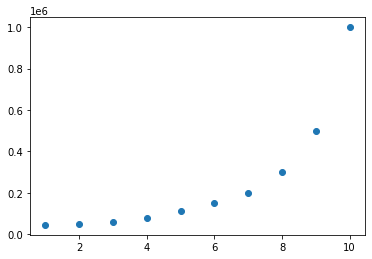

In [34]:
plt.scatter(x,y) #as seen its a curve not a line, therefore polynomial regression

In [36]:
#using all 10 in training
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=4) #take any degree

In [7]:
#use label encoding to convert from categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
xp = pr.fit_transform(x)
xp #powers till 4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [40]:
#now do normal linear regression
from sklearn.linear_model import LinearRegression
plr = LinearRegression()
plr.fit(xp,y)

LinearRegression()

In [41]:
y_pred = plr.predict(xp)
y_pred

array([[ 53356.64335675],
       [ 31759.90675984],
       [ 58642.1911421 ],
       [ 94632.86713282],
       [121724.94172495],
       [143275.05827509],
       [184003.49650352],
       [289994.17249417],
       [528694.63869462],
       [988916.08391613]])

In [45]:
#predict random
plr.predict(pr.fit_transform([[6]]))

array([[143275.05827509]])

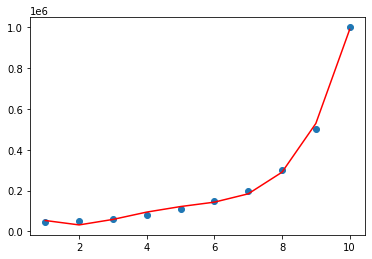

In [50]:
plt.scatter(x,y)
plt.plot(x.values,plr.predict(pr.fit_transform(x)),'r')

In [51]:
from sklearn.metrics import r2_score
acc= r2_score(y,y_pred)
acc

0.9973922891706615